In [22]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
dir_gdl = '../data/processed/2016-2019_3std_preprocessed.csv'
df = pd.read_csv(dir_gdl)
df_data = df.loc[df['PARAM']=='PM10'].copy()
df_data['FECHA'] = pd.to_datetime(df_data.FECHA)
df_data.drop(columns=['Unnamed: 0'], inplace=True)
print(df_data.shape)
df_data.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08
13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15


In [10]:
#df_data['day_of_week'] = df_data.apply(lambda row: row.loc['FECHA'].weekday(), axis=1)
df_data['day'] = df_data.apply(lambda row: row.loc['FECHA'].day, axis=1)
df_data['month'] = df_data.apply(lambda row: row.loc['FECHA'].month, axis=1)
df_data['year'] = df_data.apply(lambda row: row.loc['FECHA'].year, axis=1)
#df_data.loc[df_data['day_of_week']<=4, 'weekday'] = 1
#df_data.loc[df_data['day_of_week']>4, 'weekday'] = 0
df_data.head(2)

,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL,day,month,year
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08,1,1,2016
13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15,1,1,2016


In [12]:
df_max_day = df_data.groupby(['year','month','day']).agg(
                      ['max']).copy()
df_max_day.head(5)

FECHA   HORA PARAM    AGU     ATM     CEN  \
                               max    max   max    max     max     max   
year month day                                                           
2016 1     1   2016-01-01 23:00:00  23:00  PM10  58.84  146.95  183.20   
           2   2016-01-02 23:00:00  23:00  PM10  44.10   49.95   50.33   
           3   2016-01-03 23:00:00  23:00  PM10  29.49   41.06   51.19   
           4   2016-01-04 23:00:00  23:00  PM10  67.04  103.56  101.56   
           5   2016-01-05 23:00:00  23:00  PM10  46.04   91.92  105.64   

                   LDO LPIN     MIR     OBL     SFE     TLA    VAL  
                   max  max     max     max     max     max    max  
year month day                                                      
2016 1     1    174.04  NaN  227.12  197.67  236.37  145.76  62.45  
           2     49.11  NaN  403.20   49.09  320.22   43.36  53.54  
           3     56.61  NaN  291.67   41.17  379.31   57.01  32.26  
           4    101.29  NaN  253.64   63.20  378.25  103.62  99.31  
           5     92.85  NaN  201.21   73.36  373.38   66.07  53.49

In [23]:
baseline = df_max_day.reset_index(level=['year','month','day']).groupby(['year','month']).agg(
                      ['mean','std']).copy()
baseline.head(12)

day                  AGU                    ATM             \
                                  max                    max              
            mean       std       mean        std        mean        std   
year month                                                                
2016 1      16.0  9.092121  61.670645  17.851429   94.508387  25.416332   
     2      15.0  8.514693  80.083103  18.675674  109.887407  24.164761   
     3      16.0  9.092121  55.992258  18.137896   74.656774  22.688286   
     4      15.5  8.803408  75.530000  27.535313   81.484583  21.331106   
     5      16.0  9.092121  80.738333  13.112468   86.641667  16.972959   
     6      15.5  8.803408  59.075000  26.370934   84.675000  46.067321   
     7      16.0  9.092121  52.834000  12.914145   40.270000  11.421178   
     8      16.0  9.092121        NaN        NaN   83.918000  40.723027   
     9      15.5  8.803408  37.518750  12.666838   42.471250  14.809437   
     10     16.0  9.092121  27.660000  17.271795   43.922500  14.223964   
     11     15.5  8.803408  61.760000  19.166603   88.810000  33.792560   
     12     16.0  9.092121  76.870000  11.775347   88.991667  16.144167   

                   CEN                    LDO             ...         MIR  \
                   max                    max             ...         max   
                  mean        std        mean        std  ...        mean   
year month                                                ...               
2016 1      125.251290  60.126688  101.660435  45.625370  ...  202.923571   
     2      123.477241  42.390643  102.580345  37.002030  ...  181.427273   
     3       65.980645  23.010196   73.512903  32.801259  ...  209.236667   
     4       81.309333  22.008458   78.870333  24.172314  ...  130.288750   
     5       62.956667  16.961746   92.678421  23.982674  ...   85.262000   
     6       43.410000  18.759303   64.415333  27.774845  ...   77.625833   
     7       35.855000  13.065793   75.109677  15.968779  ...   67.864286   
     8       35.878333  14.192091   63.200323  22.297007  ...   76.433333   
     9       37.402857   9.916750   49.175333  18.810548  ...  138.615714   
     10      38.675000  14.110728   71.906316  27.039424  ...  202.640000   
     11      92.886667  38.073189   80.789310  34.542191  ...  247.530000   
     12     121.005000  30.636650  114.973226  36.578986  ...         NaN   

                              OBL                    SFE             \
                              max                    max              
                  std        mean        std        mean        std   
year month                                                            
2016 1      95.971983   80.727742  31.216509  263.347742  81.910071   
     2      56.960365   90.232759  25.408016  176.951724  52.555136   
     3      68.744262   72.029032  43.437798  129.902759  28.035486   
     4      66.322847   80.195333  25.353933  108.592857  25.906754   
     5      21.794837   81.890000  19.717451  106.225484  32.588655   
     6      28.853822   72.566667  40.303813  154.516111  67.999318   
     7      29.041109   53.363333  19.341613  191.210000  53.991949   
     8      13.135445   55.328000  16.902429  261.648710  78.983339   
     9      95.313580   39.555714  10.762667  188.960000        NaN   
     10     56.016026   39.230000  15.021587         NaN        NaN   
     11     99.164665   84.837500  36.142264         NaN        NaN   
     12           NaN  104.620000  36.510563         NaN        NaN   

                   TLA                   VAL             
                   max                   max             
                  mean        std       mean        std  
year month                                               
2016 1       94.411290  34.791556  74.434516  29.759369  
     2      111.338276  43.064206  98.963103  34.254359  
     3       62.540323  21.256703  60.257742  28.138537  
     4       76.805667  19.700171  6

In [24]:
baseline['date'] = np.nan
baseline.reset_index(inplace=True)
for i in range(len(baseline)):
    baseline.loc[i, 'date'] = str(baseline.year.iloc[i])+'-'+str(baseline.month.iloc[i])
    baseline['date'] = pd.to_datetime(baseline['date'], format = '%Y-%M')
baseline.head(5)

year month   day                  AGU                    ATM             \
                                     max                    max              
               mean       std       mean        std        mean        std   
0  2016     1  16.0  9.092121  61.670645  17.851429   94.508387  25.416332   
1  2016     2  15.0  8.514693  80.083103  18.675674  109.887407  24.164761   
2  2016     3  16.0  9.092121  55.992258  18.137896   74.656774  22.688286   
3  2016     4  15.5  8.803408  75.530000  27.535313   81.484583  21.331106   
4  2016     5  16.0  9.092121  80.738333  13.112468   86.641667  16.972959   

          CEN             ...        MIR        OBL                    SFE  \
          max             ...        max        max                    max   
         mean        std  ...        std       mean        std        mean   
0  125.251290  60.126688  ...  95.971983  80.727742  31.216509  263.347742   
1  123.477241  42.390643  ...  56.960365  90.232759  25.408016  176.951724   
2   65.980645  23.010196  ...  68.744262  72.029032  43.437798  129.902759   
3   81.309333  22.008458  ...  66.322847  80.195333  25.353933  108.592857   
4   62.956667  16.961746  ...  21.794837  81.890000  19.717451  106.225484   

                     TLA                   VAL                           date  
                     max                   max                                 
         std        mean        std       mean        std                      
0  81.910071   94.411290  34.791556  74.434516  29.759369 2016-01-01 00:01:00  
1  52.555136  111.338276  43.064206  98.963103  34.254359 2016-02-01 00:00:00  
2  28.035486   62.540323  21.256703  60.257742  28.138537 2016-03-01 00:00:00  
3  25.906754   76.805667  19.700171  66.924000  36.326648 2016-04-01 00:00:00  
4  32.588655   76.091667   8.715846  60.098333   7.319832 2016-05-01 00:00:00  

[5 rows x 25 columns]

<ErrorbarContainer object of 3 artists>

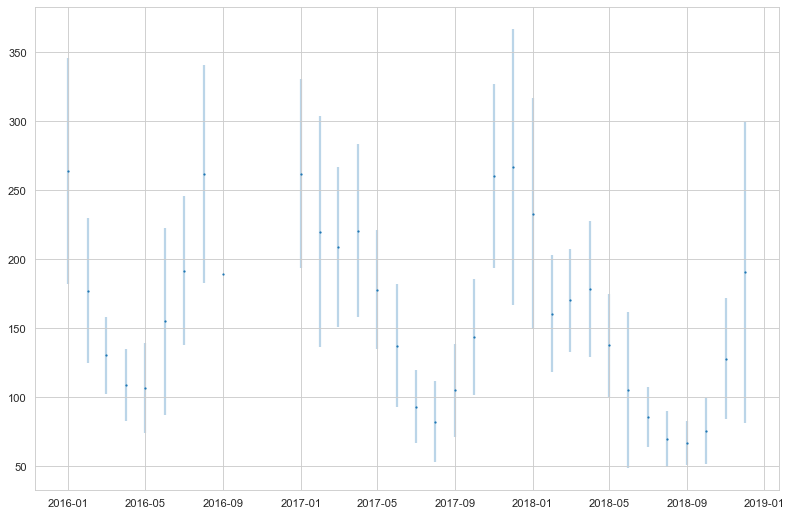

In [25]:
sns.set_style("whitegrid")
station = 'SFE'
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x=baseline['date'],y=baseline[station]['max']['mean'], s=1)
plt.errorbar(baseline['date'], baseline[station]['max']['mean'], baseline[station]['max']['std'], elinewidth=2, linestyle='None', zorder=-1, alpha=0.3)

In [38]:
def year_baseline_cont(df, station, save=False):
    
    fig,ax = plt.subplots(figsize=(12, 8))

    df_tmp = df[[station,'date']].copy()
    plt.scatter(x=df_tmp['date'],y=df_tmp[station]['max']['mean'], s=8, label='Promedio')
    plt.errorbar(df_tmp['date'], df_tmp[station]['max']['mean'], 
                 df_tmp[station]['max']['std'], elinewidth=3, 
                 linestyle='None', zorder=-1, alpha=0.2, label='Desviación estándar')
    
    plt.ylabel('$PM_{10}$ (μg/m³)', fontsize=12)
    plt.xlabel('Fecha', fontsize=12)
    
    lim_max = df_tmp[station]['max']['mean'].max() + df_tmp[station]['max']['std'].max() + 20
    plt.ylim([0, lim_max])

    ax.legend()
    
    plt.title(f'Estación: {station}')
    
    if save:

        plt.savefig(f'../output/figures/baseline/{station}_YearMonth_MaxBaseline.png', bbox_inches='tight', dpi=150)
        
    plt.show()

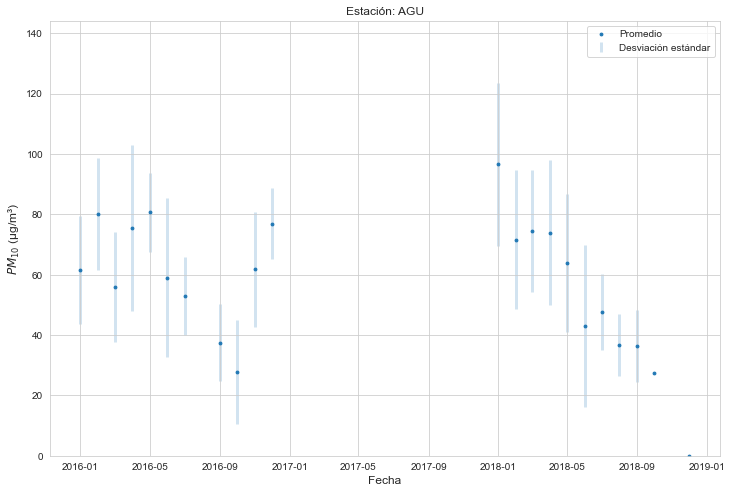

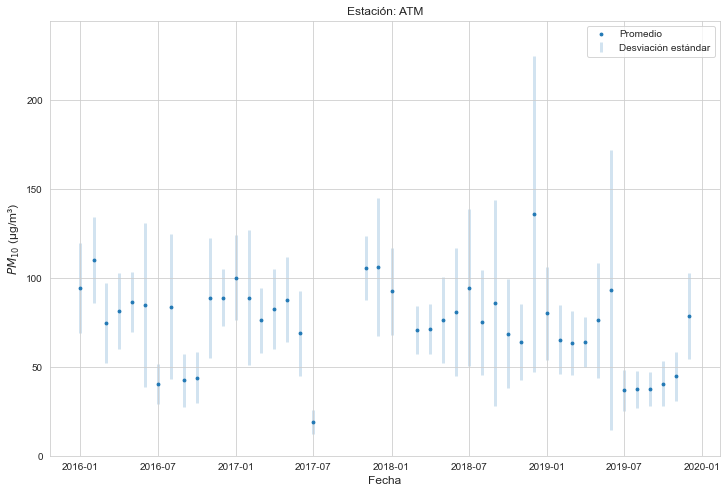

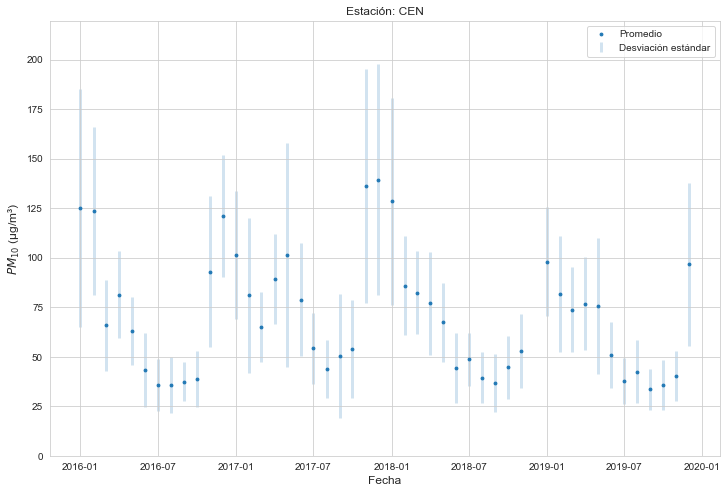

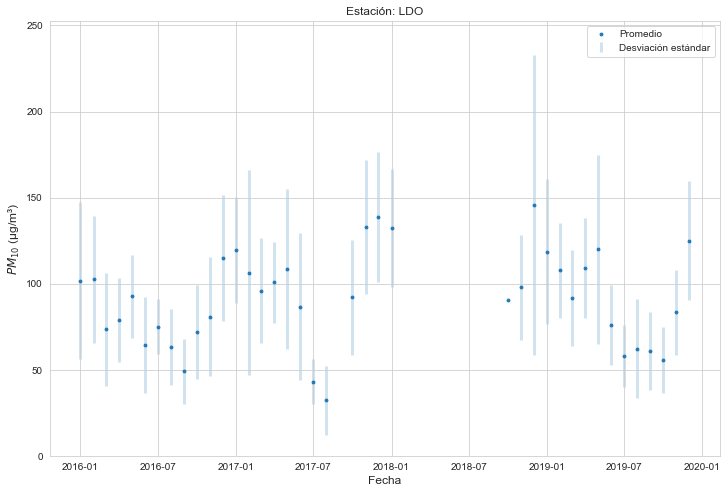

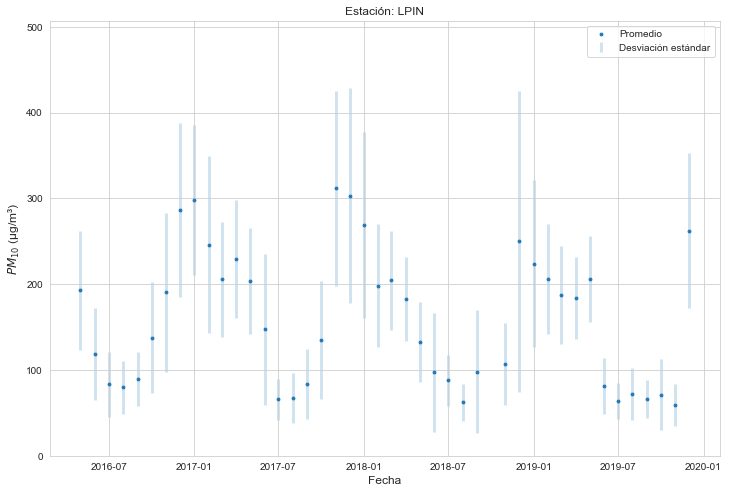

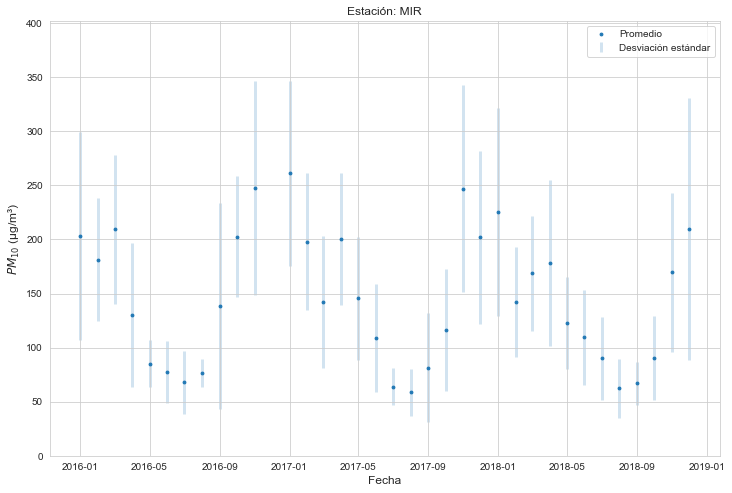

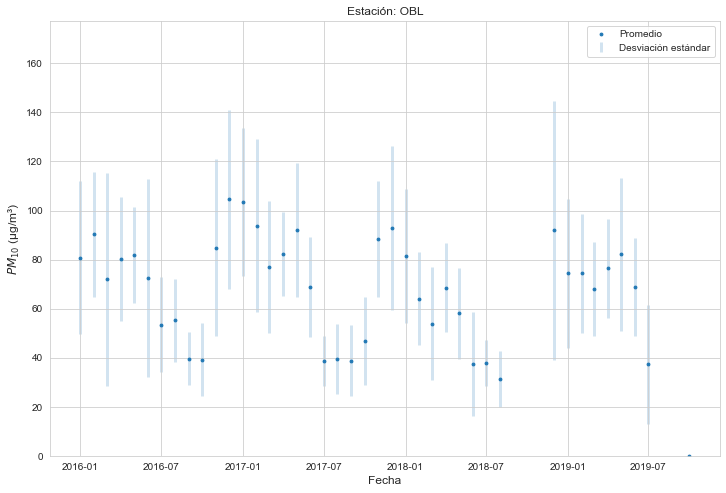

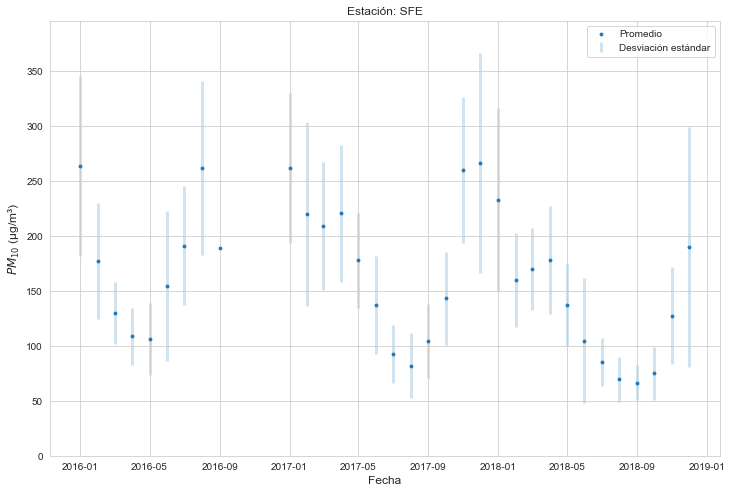

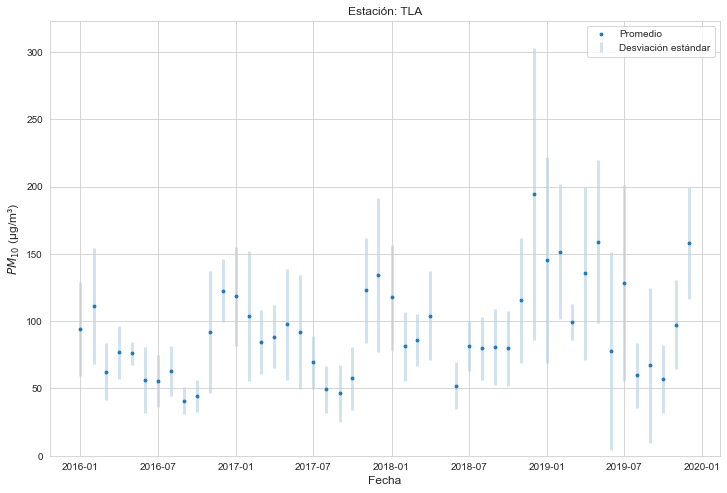

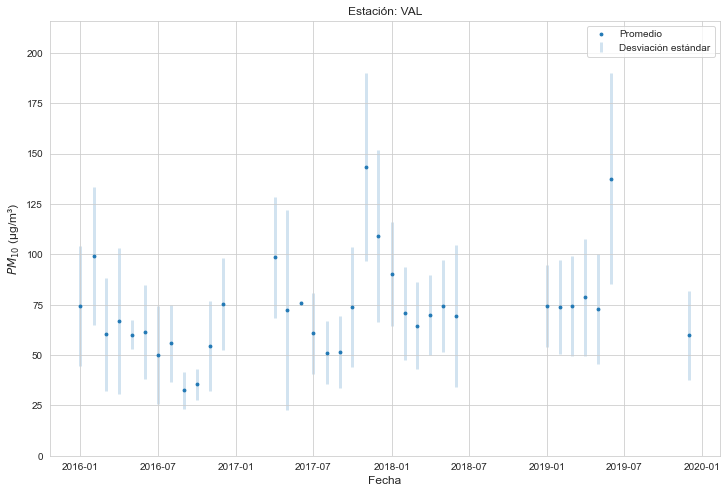

In [40]:
year_range = [2016,2017,2018,2019]
station = ['AGU','ATM','CEN','LDO','LPIN',
           'MIR','OBL','SFE','TLA','VAL']

for s in station:

    year_baseline_cont(baseline, s, save=True)

In [49]:
baseline.loc[(baseline.year==2018), ['AGU','date']]

AGU                  date
          max                      
         mean        std           
24  96.564516  26.950084 2018-01-01
25  71.582143  23.021987 2018-02-01
26  74.455172  20.174694 2018-03-01
27  73.990000  24.074301 2018-04-01
28  63.851613  22.760871 2018-05-01
29  43.140000  26.836871 2018-06-01
30  47.590323  12.583385 2018-07-01
31  36.667742  10.276685 2018-08-01
32  36.500000  11.976451 2018-09-01
33  27.300000        NaN 2018-10-01
34        NaN        NaN 2018-11-01
35   0.000000        NaN 2018-12-01

In [55]:
def year_baseline(df, year_range, station, save=False):
    
    fig,ax = plt.subplots(figsize=(12, 8))

    for y in year_range:
        df_tmp = df.loc[(df.year==y), [station,'date']].copy()
        plt.scatter(x=range(len(df_tmp)),y=df_tmp[station]['max']['mean'], s=8, label=f'Promedio - {y}')
        plt.errorbar(range(len(df_tmp)), df_tmp[station]['max']['mean'], df_tmp[station]['max']['std'], 
                     elinewidth=3, linestyle='None', zorder=-1, alpha=0.2)
        
        plt.ylabel('$PM_{10}$ (μg/m³)', fontsize=12)
        plt.xlabel('Fecha', fontsize=12)

        ax.legend()
        
    df_tmp = df[[station,'date']].copy()
    lim_max = df_tmp[station]['max']['mean'].max() + df_tmp[station]['max']['std'].max() + 20
    plt.ylim([0, lim_max])
        
    plt.title(f'Estación: {station}')

    if save:
        plt.savefig(f'../output/figures/baseline/{station}_YearMonth_All_MaxBaseline.png', bbox_inches='tight', dpi=150)
        
    plt.show()

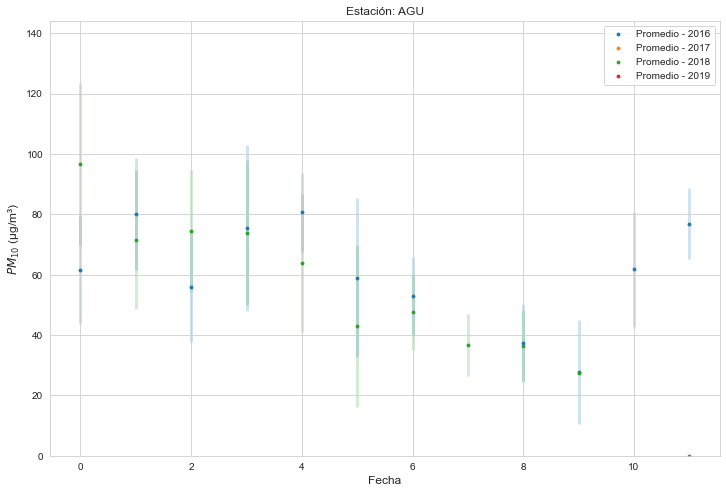

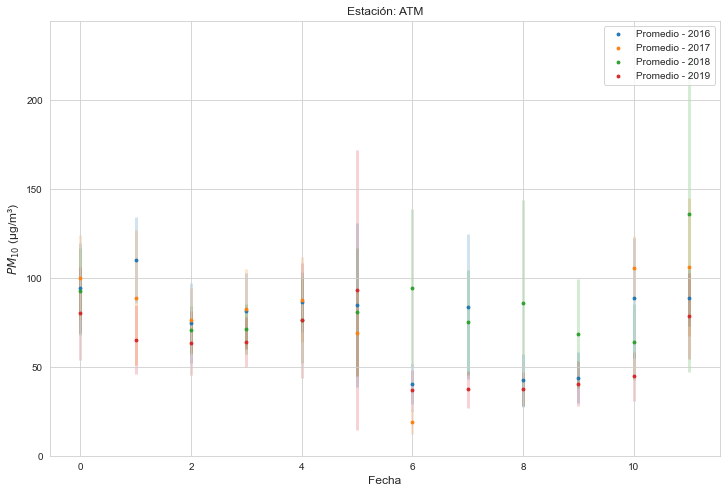

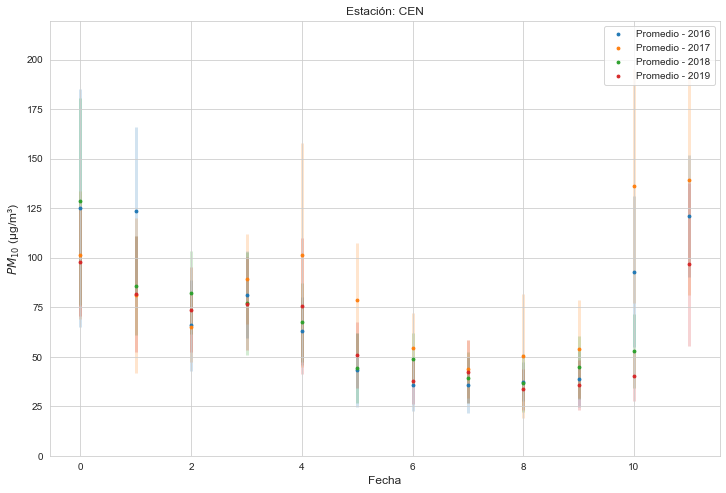

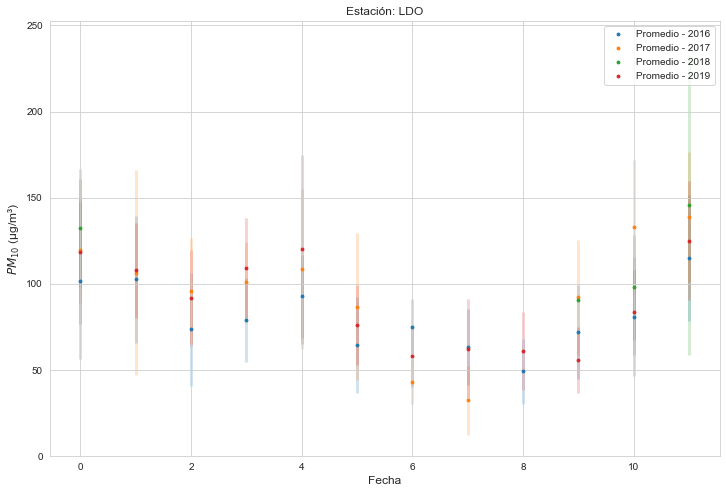

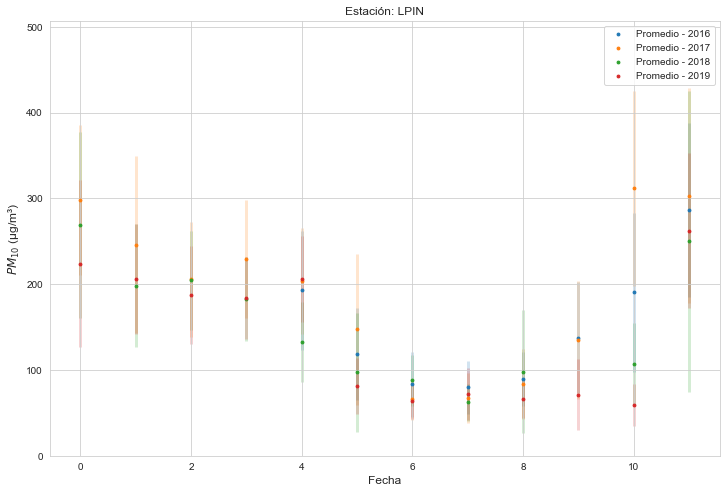

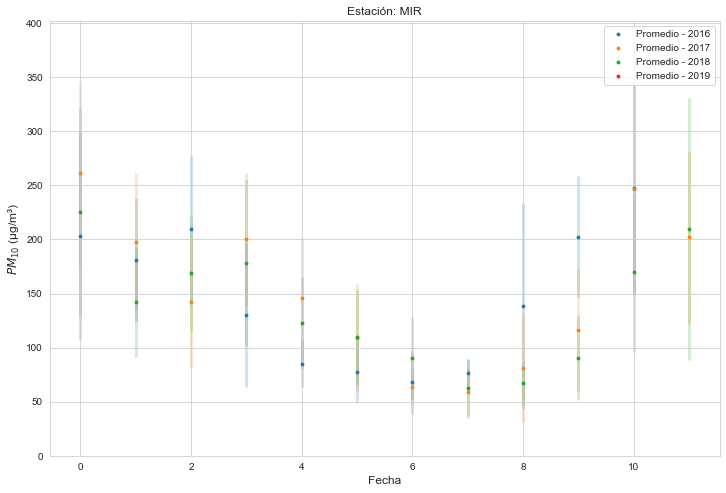

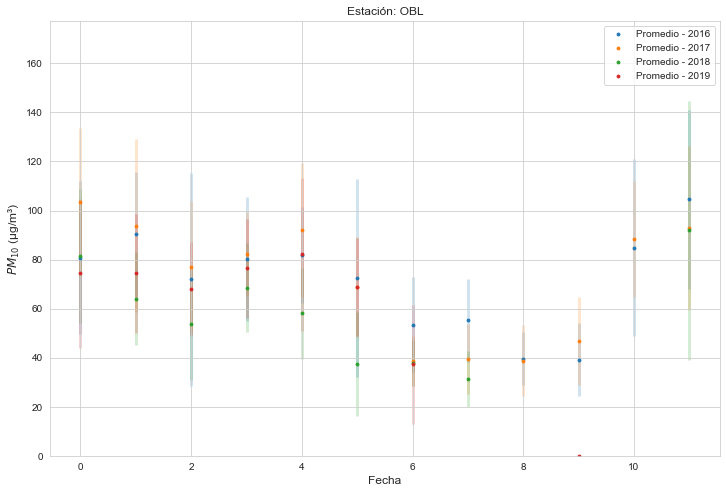

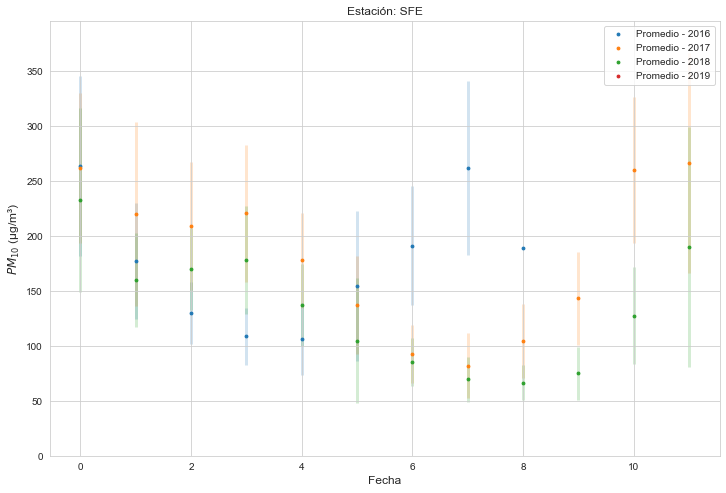

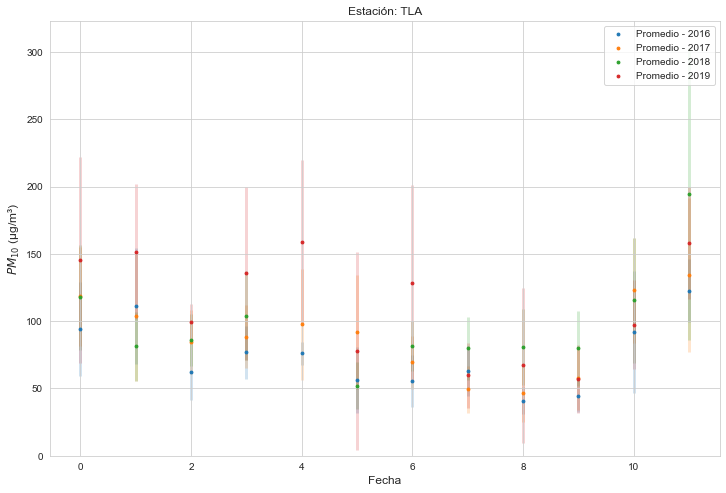

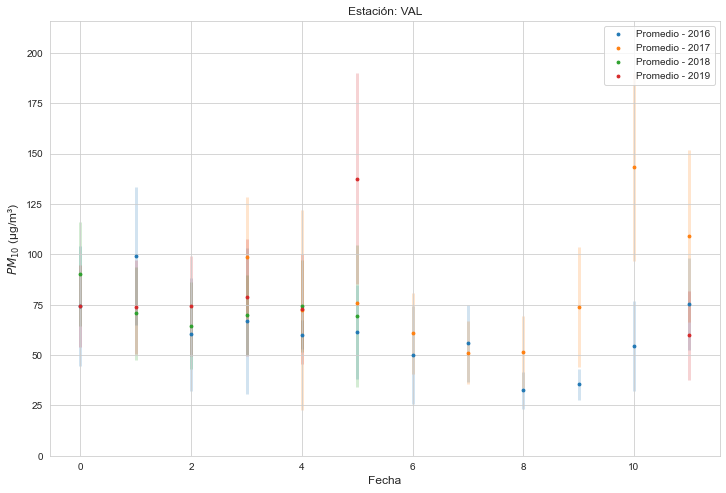

In [57]:
year_range = [2016,2017,2018,2019]
station = 'SFE'

station = ['AGU','ATM','CEN','LDO','LPIN',
           'MIR','OBL','SFE','TLA','VAL']

for s in station:
    year_baseline(baseline, year_range, s, save=True)

In [58]:
baseline.to_csv('../output/data/MaxBaseline_2016-2019.csv')